In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

# The Boussinesq approximation

The Bousinesq approximation provides a way to simulate heating effects on a fluid.

Let's begin with the incompressible Navier-Stokes equations for momentum, with the effects of gravity:

\begin{equation*}
\frac{\partial \mathbf{u} }{\partial t}+\mathbf{u}\cdot\nabla\mathbf{u}=-\frac{1}{\rho}\nabla p+\nu\nabla^{2}\mathbf{u}+\mathbf{g}\hat j
\end{equation*}

The continuity equation is imposed as a kinematic constraint on the Navier Stokes momentum equations, resulting in the Poisson pressure equation:

$$\nabla\cdot u=0$$

The Boussinesq approximation states that variations in density are neglected except in terms where they are multiplied by the acceleration due to gravity. If $\mathbf{g}'$ represents an effective gravitational constant, the NS momentum equation is

$$\begin{equation*}
\frac{\partial \mathbf{u} }{\partial t}+\mathbf{u}\cdot\nabla\mathbf{u}=-\frac{1}{\rho_0}\nabla p+\nu\nabla^{2}\mathbf{u}+\mathbf{g'}
\end{equation*}$$

We will proceed by taking the divergence of the NS momentum equation:. The left-hand side becomes:

$$\begin{equation*}
\nabla \cdot\left(\frac{\partial \mathbf{u} }{\partial t}+\mathbf{u}\cdot\nabla\mathbf{u}\right)=\frac{\partial}{\partial t}(\nabla\cdot\mathbf{u})+\nabla\cdot(\mathbf{u}\cdot\nabla)\mathbf{u}
\end{equation*}$$

The right hand side:

$$\begin{equation*}
\nabla\cdot(-\frac{1}{\rho_0}\nabla p+\nu\nabla^{2}\mathbf{u}+\mathbf{g'})=-\frac{1}{\rho_0}\nabla^{2} p+\nabla\cdot\mathbf{g'}
\end{equation*}$$

Rearranging into the Poisson pressure equation:

$$\begin{equation*}
\nabla^{2} p= -\rho_0\frac{\partial}{\partial t}(\nabla\cdot\mathbf{u})- \rho_0\nabla\cdot(\mathbf{u}\cdot\nabla)\mathbf{u}+\nabla\cdot\mathbf{g'}
\end{equation*}$$

In an analytical solution, some of these terms will be identically zero in order to satisfy continuity. However, in numerical solutions, there is no assumption that the velocity gradients are divergence free, and so the time discretization is maintained. Discretizing in time first:

$$\begin{equation*}
\nabla^{2} p=-\rho_0\frac{1}{\Delta t}(\nabla \mathbf{u}^{n+1}-\nabla \mathbf{u}^{n})-\rho_0\nabla\cdot(\mathbf{u}\cdot\nabla)\mathbf{u}+\nabla\cdot\mathbf{g'}
\end{equation*}$$

Here, we will in effect keep the present step divergence and set the next step divergence to zero, imposing a pressure that would require this condition based on the current step's divergence. Therefore, the equation effectively becomes:

$$\begin{equation*}
\nabla^{2} p=\rho_0\frac{1}{\Delta t}(\nabla \mathbf{u}^{n})-\rho_0\nabla\cdot(\mathbf{u}\cdot\nabla)\mathbf{u}+\nabla\cdot\mathbf{g'}
\end{equation*}$$

The Boussinesq approximation for a non-isothermal fluid is that there is a fluid expansion via a change in density:

$$\begin{equation*}
(\rho_{0}+\Delta \rho)\mathbf{g}=\rho_{0}(1-\beta (T-T_{0}))\mathbf{g}
\end{equation*}$$

Hence:

\begin{equation*}
\mathbf{g'}=(1-\beta (T-T_{0}))\mathbf{g}
\end{equation*}

If we were to substitute this into the continuous form of the Poisson pressure equation, the gradient of $\mathbf{g}'$ on the right gives us:

$$\begin{equation*}
\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = \frac{\rho_0}{\Delta t}\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}\right)  -\rho_0\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)+\rho_0 g\beta\left( \frac{\partial T}{\partial x}+\frac{\partial T}{\partial y}\right)
\end{equation*}$$

Expanding the NS momentum equations to include the gravity term in the y-direction:

$$\begin{equation*}
\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} =-\frac{1}{\rho_0}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right)
\end{equation*}$$

$$\begin{equation*}
\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho_0}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)-(1-\beta (T-T_{0}))g
\end{equation*}$$

To contend with the additional term $T$, we will use the advection-diffusion equation. Showing it in vector and scalar notation:

$$\begin{equation*}
\frac{\partial T}{\partial t} = D\nabla^{2} T - \mathbf{u}\cdot\nabla T
\end{equation*}$$

$$\begin{equation*}
\frac{\partial T}{\partial t}=D \left(\frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2} \right) - \left( u\frac{\partial T}{\partial x}+v\frac{\partial T}{\partial y} \right)-T\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y} \right)
\end{equation*}$$

The above equation can be discretized, and can be solved easily for $T_{n+1}$ in order to be used in the y-momentum equation. It will be used much like pressure, where both temperature and pressure are used to update the velocities. The discretized form of the advection-diffusion equation is:

$$\frac{T^{n+1}_{ij}-T^n_{ij}}{\Delta t} = D\left(\frac{T^n_{i+1,j}-2T^n_{ij}+T^n_{i-1,j}}{\Delta x^2}+\frac{T^n_{i,j+1}-2T^n_{ij}+T^n_{i,j-1}}{\Delta y^2}\right) - \left(u_{ij}\frac{T^n_{i+1,j}-T^n_{i-1,j}}{2\Delta x}+v_{ij}\frac{T^n_{,j+1}-T^n_{i,j-1}}{2\Delta y}\right) - T^n_{ij}\left(\frac{u^n_{i+1,j}-u^n_{i-1,j}}{2\Delta x}+\frac{v^n_{i,j+1}-v^n_{i,j-1}}{2\Delta y}\right)$$

This can be solved for the desired quantity $T^{n+1}_{ij}$:

$$T^{n+1}_{ij} =T^n_{ij}+D{\Delta t}\left(\frac{T^n_{i+1,j}-2T^n_{ij}+T^n_{i-1,j}}{\Delta x^2}+\frac{T^n_{i,j+1}-2T^n_{ij}+T^n_{i,j-1}}{\Delta y^2}\right) - {\Delta t}\left(u_{ij}\frac{T^n_{i+1,j}-T^n_{i-1,j}}{2\Delta x}+v_{ij}\frac{T^n_{i,j+1}-T^n_{i,j-1}}{2\Delta y}\right) - T^n_{ij}{\Delta t}\left(\frac{u^n_{i+1,j}-u^n_{i-1,j}}{2\Delta x}+\frac{v^n_{i,j+1}-v^n_{i,j-1}}{2\Delta y}\right)$$

In [1]:
# Reusing Poisson pressure equation solver from pressure_velocity_cavity.ipynb with the more rigorous boundary conditions
def pressPoisson(p, dx, dy, dt, rho, nu, u, v, nit):
    import numpy as np
    pn = np.empty_like(p)
    b = np.empty_like(p)
    
    # For readibility, the term in square brackets is below
    b[1:-1,1:-1] = (1/dt * ((u[1:-1,2:]-u[1:-1,:-2])/(2*dx) + (v[2:,1:-1]-v[:-2,1:-1])/(2*dy))
                    - ((u[1:-1,2:]-u[1:-1,:-2])/(2*dx))**2
                    - ((v[2:,1:-1]-v[:-2,1:-1])/(2*dy))**2
                    - 2 * (u[2:,1:-1]-u[:-2,1:-1])/(2*dy) * (v[1:-1,2:]-v[1:-1,:-2])/(2*dx))
    
    for n in range(nit):
        pn = np.copy(p)
        p[1:-1,1:-1] = (((pn[1:-1,2:]+pn[1:-1,:-2])*dy**2 + (pn[2:,1:-1]+p[:-2,1:-1])*dx**2)/(2*(dx**2+dy**2))
                        - rho*dx**2*dy**2/(2*(dx**2+dy**2)) * b[1:-1,1:-1])
        # Boundary conditions
        ## at y = Ly (free surface)
        ## The position of the centered second difference makes the pressure be a forward difference, aka (p[-2] - p[-1])/dy
        p[-1,:] = p[-2,:] - rho*nu/dy*(v[-1,:]-2*v[-2,:]+v[-3,:])
        ## at y = 0 (bottom)
        ## This creates a backward difference for the pressure derivative, (p[1] - p[0])/dy
        p[0,:] = p[1,:] - rho*nu/dy*(v[0,:]-2*v[1,:]+v[2,:])
        ## at x = 0 (left)
        ## This is a backward difference for pressure (p[1] - p[0])/dx
        p[:,0] = p[:,1] - rho*nu/dx*(u[:,0]-2*u[:,1]+u[:,2])
        ## at x = Lx (right)
        ## This is a forward difference, (p[-2] - p[-1])/dx
        p[:,-1] = p[:,-2] - rho*nu/dx*(u[:,-1]-2*u[:,-2]+u[:,-3])
    return p

In [28]:
def makegraph(X, Y, T, u, v, nt):
    plt.contourf(X,Y,T,20,cmap=cm.jet)    
    plt.colorbar()
    plt.quiver(X[::1,::1],Y[::1,::1],u[::1,::1],v[::1,::1],0) 
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Time steps: {nt}')

In [14]:
def cavity_flow(nt):
    # I prefer to define parameters inside the main function rather than pass them as arguments
    nx = 41
    ny = 41
    nit= 500
    c = 1
    dx = 1./(nx-1)
    dy = 1./(ny-1)
    x = np.linspace(0,1,nx)
    y = np.linspace(0,1,ny)
    X,Y = np.meshgrid(x,y)

    rho = 1
    nu = 0.1
    dt = .001
    T0 = 0
    T_high = 1
    D = 0.1
    g = 1
    beta = 0.01
    
    u = np.zeros((ny, nx))
    v = np.zeros((ny, nx))
    b = np.zeros((ny, nx))
    p = np.zeros((ny, nx))
    T = np.ones((ny, nx)) * T0
    
    for n in range(nt):
        un = np.copy(u)
        vn = np.copy(v)
        Tn = np.copy(T)
        
        # Compute pressure from current velocity
        p = pressPoisson(p, dx, dy, dt, rho, nu, u, v, nit)
        
        # Update velocity with intermediate pressures
        u[1:-1,1:-1] = (un[1:-1,1:-1] - un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[1:-1,:-2])
                       - vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[:-2,1:-1])
                       - dt/(2*rho*dx)*(p[1:-1,2:]-p[1:-1,:-2])
                       + nu*(dt/dx**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,:-2])
                            + dt/dy**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[:-2,1:-1])))
        
        v[1:-1,1:-1] = (vn[1:-1,1:-1] - un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[1:-1,:-2])
                       - vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[:-2,1:-1])
                       - dt/(2*rho*dy)*(p[2:,1:-1]-p[:-2,1:-1])
                       + nu*(dt/dx**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,:-2])
                            + dt/dy**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[:-2,1:-1]))-(1-beta*(T[1:-1,1:-1]-T0))*g*dt)
        # Compute T
        T[1:-1,1:-1] = (Tn[1:-1,1:-1] + D*dt*((Tn[1:-1,2:]-2*Tn[1:-1,1:-1]+Tn[1:-1,:-2])/dx**2
                                             +(Tn[2:,1:-1]-2*Tn[1:-1,1:-1]+Tn[:-2,1:-1])/dy**2)
                                        - dt*(u[1:-1,1:-1]*(T[1:-1,2:]-T[1:-1,:-2])/(2*dx)
                                             +v[1:-1,1:-1]*(T[2:,1:-1]-T[:-2,1:-1])/(2*dy))
                            -T[1:-1,1:-1]*dt*((u[1:-1,2:]-u[1:-1,:-2])/(2*dx)
                                             +(v[2:,1:-1]-v[:-2,1:-1])/(2*dy)))
        # Temperature BCs
        T[0,:] = T_high
        T[:,0] = 2*T[:,1]-T[:,2]
        T[:,-1] = 2*T[:,-2]-T[:,-3]
        T[-1,:] = T0
        
        #No-slip boudary condition is applied at all boundary
        u[0,:] = 0
        u[:,0] = 0
        u[:,-1] = 0
        u[-1,:] = 0
        v[0,:] = 0
        v[-1,:] = 0
        v[:,0] = 0
        v[:,-1] = 0
        
    return u, v, p, T, X, Y

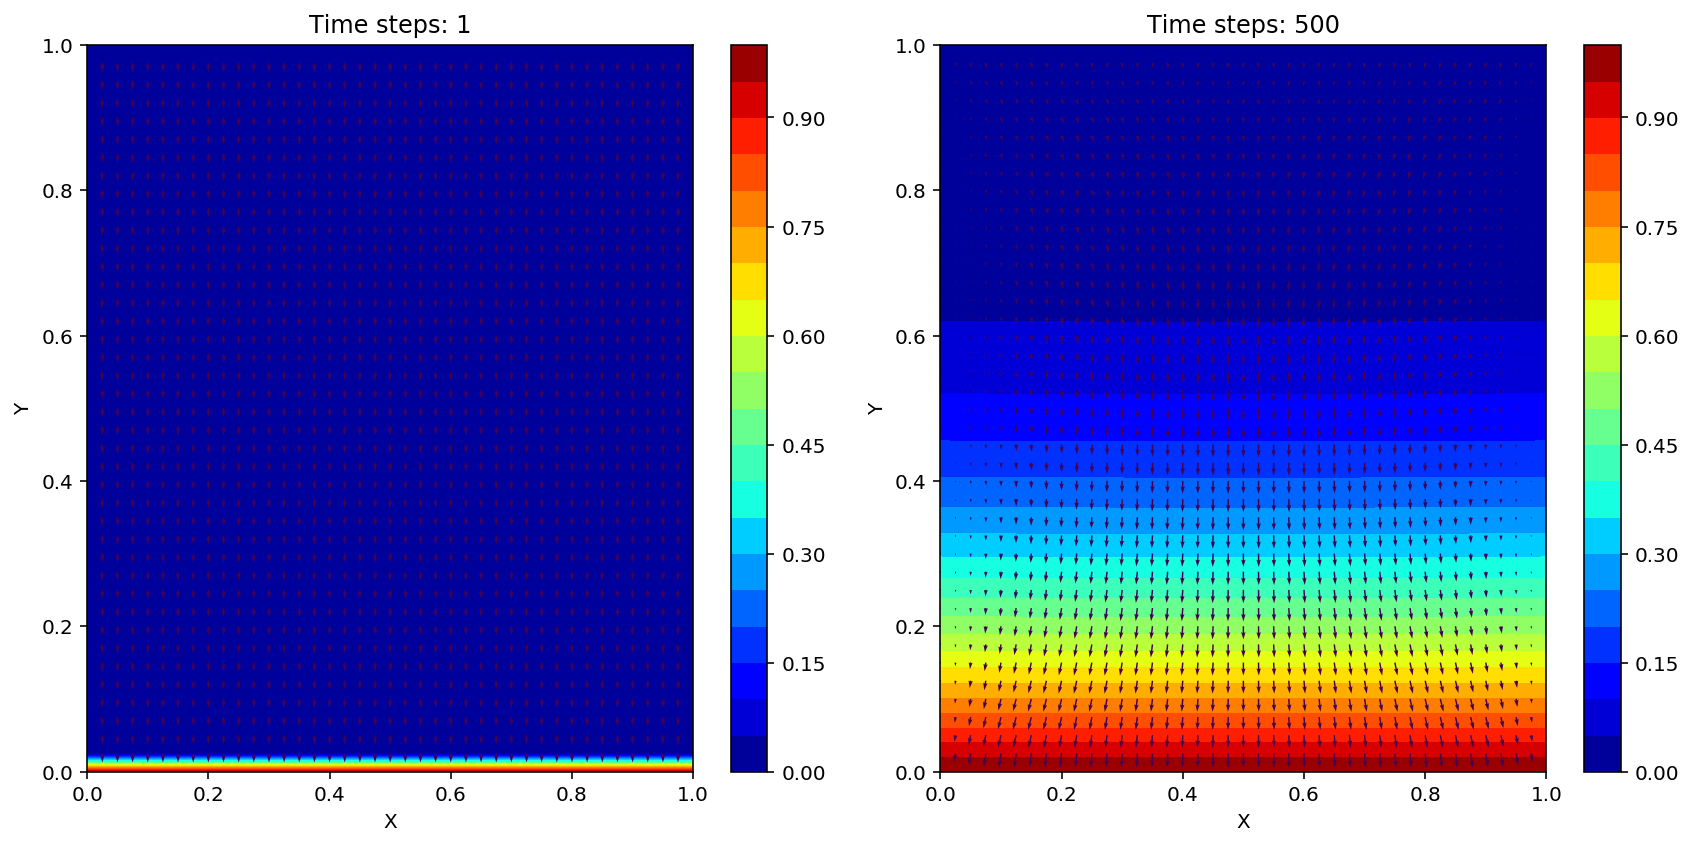

In [35]:
u, v, p, T, X, Y = cavity_flow(1)
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)
makegraph(X, Y, T, u, v, 1)
u, v, p, T, X, Y = cavity_flow(500)
ax = fig.add_subplot(122)
makegraph(X, Y, T, u, v, 500)
plt.tight_layout()

These results are actually as expected. The initial conditions put the system in a stable state. The uniform heating on the bottom introduces no spatial perturbations, and so the fluid rises and falls. Let's introduce a perturbation on the bottom to break stability and induce convection:

$$v|_{y=0} = 0.01 t   \sin(4\pi x) e^{-10t}$$

In [58]:
def cavity_flow2(nt):
    # I prefer to define parameters inside the main function rather than pass them as arguments
    nx = 41
    ny = 41
    nit= 500
    c = 1
    dx = 1./(nx-1)
    dy = 1./(ny-1)
    x = np.linspace(0,1,nx)
    y = np.linspace(0,1,ny)
    X,Y = np.meshgrid(x,y)

    rho = 1
    nu = 0.1
    dt = .001
    T0 = 0
    T_high = 1
    D = 0.1
    g = 1
    beta = 0.01
    
    u = np.zeros((ny, nx))
    v = np.zeros((ny, nx))
    b = np.zeros((ny, nx))
    p = np.zeros((ny, nx))
    T = np.ones((ny, nx)) * T0
    v0 = np.zeros(nx)
    
    for i in range(nx):
        v0[i]=np.sin(3*np.pi*x[i])  #The pertubation imposed on bottom surface
    
    for n in range(nt):
        un = np.copy(u)
        vn = np.copy(v)
        Tn = np.copy(T)
        
        # Compute pressure from current velocity
        p = pressPoisson(p, dx, dy, dt, rho, nu, u, v, nit)
        
        # Update velocity with intermediate pressures
        u[1:-1,1:-1] = (un[1:-1,1:-1] - un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[1:-1,:-2])
                       - vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[:-2,1:-1])
                       - dt/(2*rho*dx)*(p[1:-1,2:]-p[1:-1,:-2])
                       + nu*(dt/dx**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,:-2])
                            + dt/dy**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[:-2,1:-1])))
        
        v[1:-1,1:-1] = (vn[1:-1,1:-1] - un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[1:-1,:-2])
                       - vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[:-2,1:-1])
                       - dt/(2*rho*dy)*(p[2:,1:-1]-p[:-2,1:-1])
                       + nu*(dt/dx**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,:-2])
                            + dt/dy**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[:-2,1:-1]))-(1-beta*(T[1:-1,1:-1]-T0))*g*dt)
        # Compute T
        T[1:-1,1:-1] = (Tn[1:-1,1:-1] + D*dt*((Tn[1:-1,2:]-2*Tn[1:-1,1:-1]+Tn[1:-1,:-2])/dx**2
                                             +(Tn[2:,1:-1]-2*Tn[1:-1,1:-1]+Tn[:-2,1:-1])/dy**2)
                                        - dt*(u[1:-1,1:-1]*(T[1:-1,2:]-T[1:-1,:-2])/(2*dx)
                                             +v[1:-1,1:-1]*(T[2:,1:-1]-T[:-2,1:-1])/(2*dy))
                            -T[1:-1,1:-1]*dt*((u[1:-1,2:]-u[1:-1,:-2])/(2*dx)
                                             +(v[2:,1:-1]-v[:-2,1:-1])/(2*dy)))
        # Temperature BCs
        T[0,:] = T_high
        T[:,0] = 2*T[:,1]-T[:,2]
        T[:,-1] = 2*T[:,-2]-T[:,-3]
        T[-1,:] = T0
        
        #No-slip boudary condition is applied at all boundary
        u[0,:] = 0
        u[:,0] = 0
        u[:,-1] = 0
        u[-1,:] = 0
        v[0,:] = 0.05*n*v0[:]*np.exp(-0.01*n)
        v[-1,:] = 0
        v[:,0] = 0
        v[:,-1] = 0
        
    return u, v, p, T, X, Y

In [59]:
#PLOT AT DIFFERENT TIME STEP
    
fig = plt.figure(figsize=(15,18), dpi=300)

# Time step 1
nt=1
u, v, p, T, X, Y = cavity_flow2(nt)
ax = fig.add_subplot(321)
makegraph(X, Y, T, u, v, nt)

# Time step 100
nt=100
u, v, p, T, X, Y = cavity_flow2(nt)
ax = fig.add_subplot(322)
makegraph(X, Y, T, u, v, nt)

# Time step 200
nt=200
u, v, p, T, X, Y = cavity_flow2(nt)
ax = fig.add_subplot(323)
makegraph(X, Y, T, u, v, nt)


# Time step 300
nt=300
u, v, p, T, X, Y = cavity_flow2(nt)
ax = fig.add_subplot(324)
makegraph(X, Y, T, u, v, nt)


# Time step 400
nt=400
u, v, p, T, X, Y = cavity_flow2(nt)
ax = fig.add_subplot(325)
makegraph(X, Y, T, u, v, nt)

# Time step 500
nt=500
u, v, p, T, X, Y = cavity_flow2(nt)
ax = fig.add_subplot(326)
makegraph(X, Y, T, u, v, nt)

plt.tight_layout()